In [5]:
%run solution.py

100%|##########| 5/5 [00:00<00:00,  7.47it/s]


In [23]:

from problem import Action, available_actions, Corner, Driver, Experiment, Environment, State, DRAWING_FREQUENCY
from solution import OffPolicyNStepSarsaDriver


experiment = Experiment(
        environment=Environment(
            corner=Corner(
                name='corner_b'
            ),
            steering_fail_chance=0.01,
        ),
        driver=OffPolicyNStepSarsaDriver(
            step_no=5,
            step_size=0.3,
            experiment_rate=0.05, #alpha
            discount_factor=1.00, ##gamma
        ),
        number_of_episodes=10000
)

DRAWING_FREQUENCY = 100000
experiment.run()


100%|##########| 10000/10000 [02:17<00:00, 72.61it/s]


<Figure size 432x288 with 0 Axes>

In [25]:
DRAWING_FREQUENCY = 1
experiment.driver.experiment_rate = 0.0
experiment.current_episode_no = 0
experiment.number_of_episodes = 40
experiment.run()

100%|##########| 40/40 [00:12<00:00,  3.32it/s]


<Figure size 432x288 with 0 Axes>

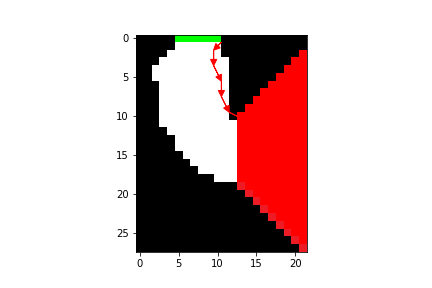

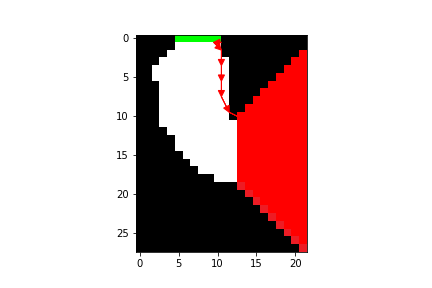

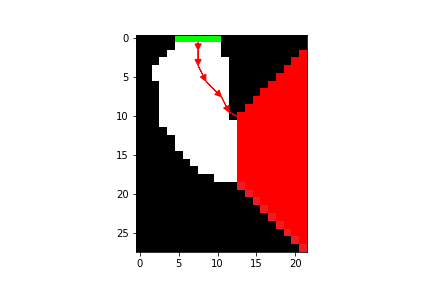

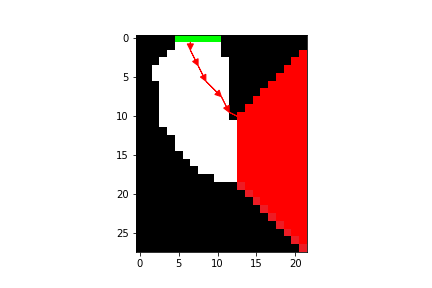

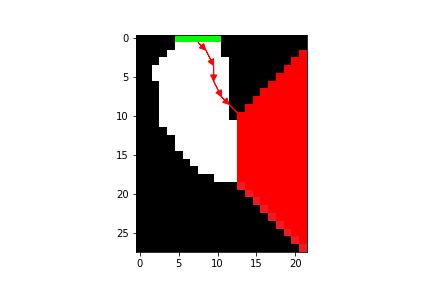

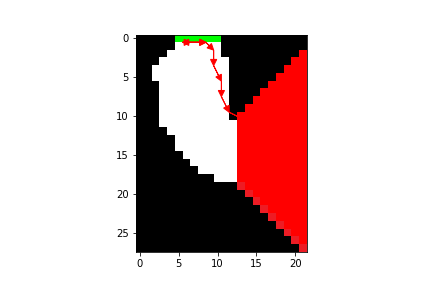

In [26]:
from IPython.display import Image
from IPython.display import display

x = [Image(filename=f'plots/track_{i}.png') for i in range(6)]
display(*x)



In [9]:
from __future__ import annotations
import collections
import random

import numpy as np
import sklearn.preprocessing as skl_preprocessing

from problem import Action, available_actions, Corner, Driver, Experiment, Environment, State, DRAWING_FREQUENCY


In [11]:
import solution


[-127,
 -186,
 -63,
 -10,
 -12,
 -33,
 -47,
 -35,
 -107,
 -101,
 -318,
 -77,
 -107,
 -138,
 -29,
 -22,
 -407,
 -26,
 -50,
 -100,
 -15,
 -134,
 -23,
 -26,
 -44,
 -270,
 -16,
 -84,
 -27,
 -22,
 -8,
 -144,
 -252,
 -15,
 -40,
 -76,
 -13,
 -200,
 -117,
 -28,
 -21,
 -363,
 -31,
 -17,
 -237,
 -67,
 -240,
 -15,
 -26,
 -71,
 -21,
 -172,
 -60,
 -74,
 -51,
 -127,
 -453,
 -16,
 -12,
 -10,
 -12,
 -44,
 -86,
 -35,
 -30,
 -67,
 -50,
 -172,
 -142,
 -86,
 -131,
 -63,
 -319,
 -15,
 -47,
 -278,
 -12,
 -181,
 -42,
 -44,
 -30,
 -50,
 -188,
 -92,
 -139,
 -20,
 -63,
 -70,
 -22,
 -89,
 -93,
 -190,
 -82,
 -109,
 -104,
 -65,
 -18,
 -50,
 -103,
 -18,
 -9,
 -125,
 -10,
 -23,
 -35,
 -38,
 -27,
 -10,
 -133,
 -87,
 -142,
 -55,
 -229,
 -134,
 -104,
 -121,
 -162,
 -114,
 -192,
 -128,
 -66,
 -15,
 -96,
 -22,
 -93,
 -154,
 -31,
 -107,
 -55,
 -12,
 -75,
 -60,
 -88,
 -57,
 -12,
 -37,
 -44,
 -251,
 -18,
 -225,
 -81,
 -118,
 -63,
 -92,
 -13,
 -29,
 -58,
 -19,
 -31,
 -39,
 -26,
 -81,
 -109,
 -5,
 -54,
 -24,
 -34,
 -32,
 -74,